In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Flatten, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:
train_path = "C:/Users/admin/Documents/Material/BTECH PROJECT/Trash/CustomData/Custom"

In [5]:
def create_train_gen():
    train_datagen = ImageDataGenerator(
        rescale = 1./255,
        preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
        shear_range = 0.2,
        zoom_range = 0.2,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
    )
    
    train_generator = train_datagen.flow_from_directory(
        directory = train_path,
        target_size = (128, 128),
        class_mode = 'binary',
        batch_size = 32,
        subset = 'training'
    )
    
    return train_generator
X_train = create_train_gen()

Found 5535 images belonging to 2 classes.


In [6]:
def create_valid_gen():
    valid_datagen = ImageDataGenerator(
        rescale = 1./255,
        preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
        validation_split = 0.1
    )
    
    valid_generator = valid_datagen.flow_from_directory(
        directory = train_path,
        target_size = (128, 128),
        class_mode = 'binary',
        batch_size = 32,
        subset = 'validation'
    )
    return valid_generator

X_valid = create_valid_gen()

Found 553 images belonging to 2 classes.


In [7]:
def plotImages(images):
    fig, axes = plt.subplots(1, 6, figsize=(50,50))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

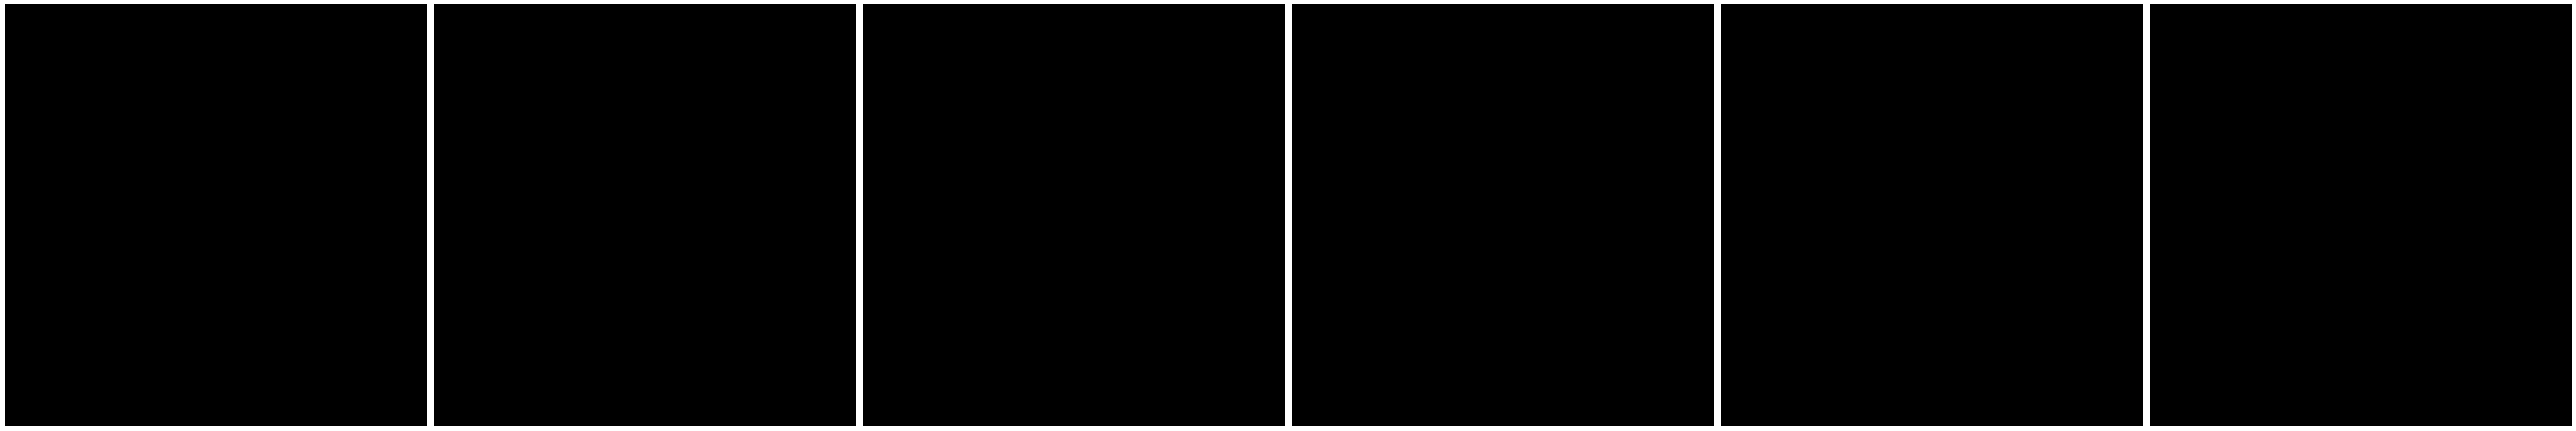

In [8]:
imgs, labels = next(X_train)
plotImages(imgs)

In [9]:
len(X_train)

173

In [10]:
IMG_SIZE = 128
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = tf.keras.applications.VGG16(input_shape = IMG_SHAPE,
                                       include_top = False,
                                       weights = 'imagenet')

for layer in base_model.layers:
  layer.trainable = False

In [11]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [12]:
def vgg16_model():
    model = Sequential()

    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())

    model.add(Dense(units = 128, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return model
    
model = vgg16_model()

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [14]:
model_details = model.fit(x = X_train, epochs = 30, validation_data = X_valid)

Epoch 1/30
173/173 [==============================] - 406s 2s/step - loss: 0.4476 - accuracy: 0.7899 - val_loss: 0.3515 - val_accuracy: 0.8517
Epoch 2/30
173/173 [==============================] - 283s 2s/step - loss: 0.2522 - accuracy: 0.8942 - val_loss: 0.2725 - val_accuracy: 0.8951
Epoch 3/30
173/173 [==============================] - 274s 2s/step - loss: 0.2217 - accuracy: 0.9088 - val_loss: 0.3377 - val_accuracy: 0.8517
Epoch 4/30
173/173 [==============================] - 268s 2s/step - loss: 0.2186 - accuracy: 0.9118 - val_loss: 0.2251 - val_accuracy: 0.9078
Epoch 5/30
173/173 [==============================] - 273s 2s/step - loss: 0.2134 - accuracy: 0.9143 - val_loss: 0.2343 - val_accuracy: 0.9186
Epoch 6/30
173/173 [==============================] - 296s 2s/step - loss: 0.2168 - accuracy: 0.9128 - val_loss: 0.2380 - val_accuracy: 0.9114
Epoch 7/30
173/173 [==============================] - 278s 2s/step - loss: 0.2159 - accuracy: 0.9150 - val_loss: 0.2672 - val_accuracy: 0.8933

In [15]:
loss = model_details.history['loss']
accuracy = model_details.history['accuracy']
val_loss = model_details.history['val_loss']
val_accuracy = model_details.history['val_accuracy']

In [16]:
import matplotlib.pyplot as plt

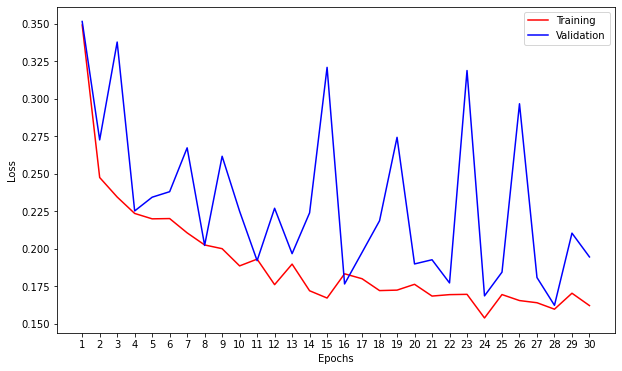

In [17]:
epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,val_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()

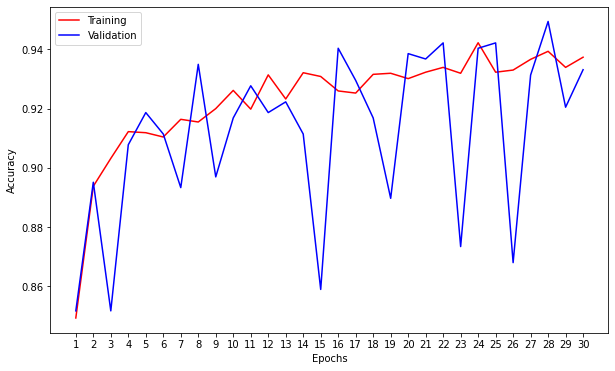

In [18]:
fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,c="red",label="Training")
plt.plot(epochs,val_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()

In [19]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()
open("vgg16_trash_2.tflite", 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\admin\AppData\Local\Temp\tmpj0y_qbpx\assets


59133944